# 1. Import Data, Package & EDA

In [1]:
# Import the google.colab module
import google.colab

# Mount Google Drive
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = '/content/drive/MyDrive/UCSD_Courses/Behavior_Finance/Pre_processed_data/factors_return.feather'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py


In [4]:
df = pd.read_feather(data)
#df = pd.DataFrame(df)
df

,"Sector(Familiarity,FOMO,Herding)",%Sale - %Inventory,Herding,Loss Aversion Riding,Volatility,Momentum,Valuation Convergence,Profitability,Value,Our Strategy (Ranking Method),Market_Excess_Return,Risk Free Return
DATE,,,,,,,,,,,,
1974-01-31,-0.039364,-0.003117,0.113484,0.128795,0.133720,-0.122228,0.192571,-0.168925,0.073068,0.127387,-0.001804,0.006217
1974-02-28,-0.021211,-0.015511,-0.005289,0.041179,-0.005330,0.020112,-0.013239,-0.031865,0.016863,-0.006047,-0.003888,0.006233
1974-03-31,0.015672,0.008027,-0.008718,-0.003956,0.019802,-0.082033,0.017139,0.007512,0.072656,0.039475,-0.029581,0.006217
1974-04-30,0.006487,-0.000674,-0.012960,-0.008926,0.006278,0.027557,-0.017922,-0.024643,-0.014734,-0.109531,-0.052861,0.006900
1974-05-31,-0.003814,-0.006312,0.011362,-0.000633,-0.022538,-0.015067,0.053731,0.054078,-0.000938,-0.108021,-0.049398,0.007417
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,-0.052646,0.057509,0.019739,-0.014994,0.036695,-0.084761,-0.039402,-0.038161,0.069255,0.039541,0.031330,0.004294
2023-08-31,0.002337,-0.028740,0.011516,0.026361,-0.023035,0.057326,0.049004,-0.005440,-0.004757,-0.004866,-0.024978,0.004373
2023-09-30,-0.004504,0.009664,-0.017287,-0.030777,-0.018786,0.006178,-0.012378,-0.001259,0.005207,-0.060656,-0.051805,0.004415


In [5]:
factors = [
    'Sector(Familiarity,FOMO,Herding)','%Sale - %Inventory', 'Herding', 'Loss Aversion Riding', 'Volatility',
    'Momentum', 'Valuation Convergence', 'Profitability', 'Market_Excess_Return'
]
# Select the relevant columns
factor_data = df[factors]
factor_data

,"Sector(Familiarity,FOMO,Herding)",%Sale - %Inventory,Herding,Loss Aversion Riding,Volatility,Momentum,Valuation Convergence,Profitability,Market_Excess_Return
DATE,,,,,,,,,
1974-01-31,-0.039364,-0.003117,0.113484,0.128795,0.133720,-0.122228,0.192571,-0.168925,-0.001804
1974-02-28,-0.021211,-0.015511,-0.005289,0.041179,-0.005330,0.020112,-0.013239,-0.031865,-0.003888
1974-03-31,0.015672,0.008027,-0.008718,-0.003956,0.019802,-0.082033,0.017139,0.007512,-0.029581
1974-04-30,0.006487,-0.000674,-0.012960,-0.008926,0.006278,0.027557,-0.017922,-0.024643,-0.052861
1974-05-31,-0.003814,-0.006312,0.011362,-0.000633,-0.022538,-0.015067,0.053731,0.054078,-0.049398
...,...,...,...,...,...,...,...,...,...
2023-07-31,-0.052646,0.057509,0.019739,-0.014994,0.036695,-0.084761,-0.039402,-0.038161,0.031330
2023-08-31,0.002337,-0.028740,0.011516,0.026361,-0.023035,0.057326,0.049004,-0.005440,-0.024978
2023-09-30,-0.004504,0.009664,-0.017287,-0.030777,-0.018786,0.006178,-0.012378,-0.001259,-0.051805


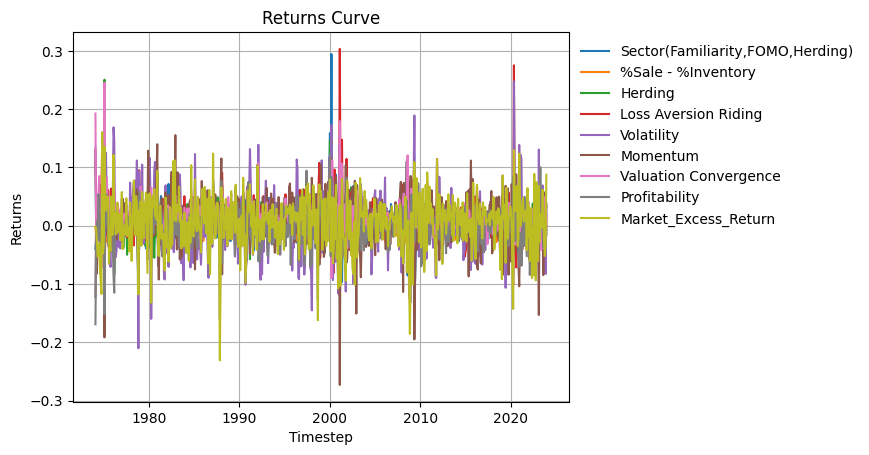

In [6]:


#values are already returns, we plot them directly
plt.figure()
plt.plot(factor_data)
plt.xlabel('Timestep')
plt.ylabel('Returns')
plt.title('Returns Curve')
plt.legend(factor_data.columns, loc='best', bbox_to_anchor=(1, 1), frameon=False)
plt.grid(True)
plt.show()


In [7]:
factor_data.cov()

,"Sector(Familiarity,FOMO,Herding)",%Sale - %Inventory,Herding,Loss Aversion Riding,Volatility,Momentum,Valuation Convergence,Profitability,Market_Excess_Return
"Sector(Familiarity,FOMO,Herding)",0.000851,0.000048,0.000276,-0.000179,-0.000139,0.000643,-0.000207,0.000072,-0.000235
%Sale - %Inventory,0.000048,0.000285,-0.000003,-0.000043,-0.000081,0.000057,-0.000028,0.000008,-0.000049
Herding,0.000276,-0.000003,0.000665,0.000361,0.000138,0.000113,0.000144,-0.000030,0.000069
Loss Aversion Riding,-0.000179,-0.000043,0.000361,0.001156,0.000715,-0.000277,0.000456,0.000079,0.000511
Volatility,-0.000139,-0.000081,0.000138,0.000715,0.002769,-0.000281,0.000364,0.000452,0.001609
Momentum,0.000643,0.000057,0.000113,-0.000277,-0.000281,0.001851,-0.000179,0.000357,-0.000054
Valuation Convergence,-0.000207,-0.000028,0.000144,0.000456,0.000364,-0.000179,0.000720,-0.000038,0.000244
Profitability,0.000072,0.000008,-0.000030,0.000079,0.000452,0.000357,-0.000038,0.000970,0.000427
Market_Excess_Return,-0.000235,-0.000049,0.000069,0.000511,0.001609,-0.000054,0.000244,0.000427,0.002116


In [8]:
#

# 2. Define Portfolio Optimization Function
In this study, the optimizer maximize expected return given constraint:
- volatility constraint
- leverage contraint
-weight constraint

In [9]:


import numpy as np
import pandas as pd
from scipy.optimize import minimize


# define optimizer, given volatility constraint, weight constraint, and position constraint

def portfolio_return(weights, mean_returns):
    return np.dot(weights, mean_returns)*12

def portfolio_std(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(12)

def sharpe_ratio(weights, mean_returns, cov_matrix):
    return portfolio_return(weights, mean_returns) / portfolio_std(weights, cov_matrix)

def mean_variance_optimization(mean_returns, cov_matrix, target_std=None, print_ = True):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},  # Sum of weights is 1
                   {'type': 'ineq', 'fun': lambda weights: 1.5 - np.sum(np.abs(weights))},  # Leverage constraint
                   {'type': 'ineq', 'fun': lambda weights: np.sum(np.abs(weights)) - 0.5}]  # Minimum leverage constraint

    if target_std is not None:
        constraints.append({'type': 'ineq', 'fun': lambda weights: target_std - portfolio_std(weights, cov_matrix)})

    # Individual weight bounds
    bound = (-0.5, 1.5)
    bounds = tuple(bound for _ in range(num_assets))

    result = minimize(lambda weights: -portfolio_return(weights, mean_returns), num_assets * [1. / num_assets,],
                      method='SLSQP', bounds=bounds, constraints=constraints)

    optimal_weights = result.x

    expected_return = portfolio_return(optimal_weights, mean_returns)
    expected_std = portfolio_std(optimal_weights, cov_matrix)
    expected_sharpe_ratio = sharpe_ratio(optimal_weights, mean_returns, cov_matrix)
    if print_:
      print(f"Optimal weights: {optimal_weights}")
      print(f"Expected return: {expected_return}")
      print(f"Expected portfolio standard deviation: {expected_std}")
      print(f"Expected Sharpe ratio: {expected_sharpe_ratio}")

    return optimal_weights

# Example usage
mean_returns = factor_data.mean()
cov_matrix = factor_data.cov()

optimal_weights = mean_variance_optimization(mean_returns, cov_matrix, target_std=0.08)


Optimal weights: [ 4.30157654e-02 -2.60244869e-04  6.76015766e-02  2.99993641e-01
 -7.95742266e-02  2.51633082e-01  5.79135815e-01 -1.70165529e-01
  8.62012065e-03]
Expected return: 0.17635892011388365
Expected portfolio standard deviation: 0.08000058283084868
Expected Sharpe ratio: 2.2044704410063205


<Axes: xlabel='DATE'>

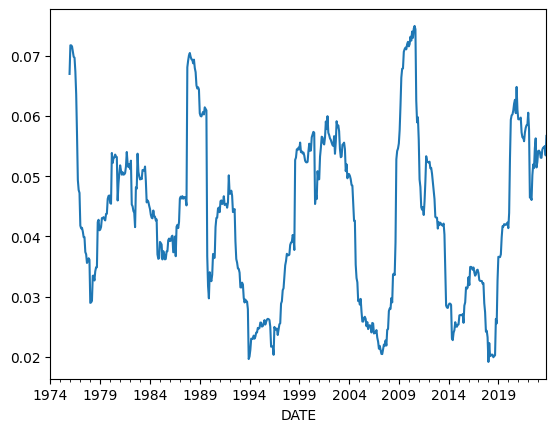

In [10]:
# Get a grasp of how volatility of Market change across time
(factor_data['Market_Excess_Return'].rolling(window=24).std()).plot()

# Weight Allocation Strategy based-on optimization
In this strategy, we set volatility constraint as lag(market_volatility).

Parameter to decide:
- lookback periods: the window to calculate factors' and market's expected return and volatitlity.
- Rebalancing frequency: yearly, monthly, or quarterly; this is also Model update frequency in this case

In [11]:
df_backtesting = factor_data.copy()

In [12]:
# Set the parameter
# we set the lookback period as 24 month
lookback = 60 #month
# we set the rebalancing/recalculating period
frequency = 'Q'

#setting target std
target_std = 0.08


df_memory = pd.DataFrame((df_backtesting['Market_Excess_Return'].rolling(window=lookback).std())*np.sqrt(12))
df_memory.columns = ['mkt_rolling_std']

In [13]:
# Calculating the mean return of each factors over time
memory_expected_excess_return = df_backtesting.rolling(window=lookback).apply(lambda x: x.mean())
# Calculating covaraince matrix over time
memory_expected_cov_matrix = df_backtesting.rolling(window=lookback).cov()



frequencies = {'M': [1,2,3,4,5,6,7,8,9,10,11,12], 'Q': [3, 6, 9, 12], 'Y': [12]}
memory_expected_excess_return = memory_expected_excess_return[memory_expected_excess_return.index.get_level_values('DATE').month.isin(frequencies[frequency])]
memory_expected_cov_matrix = memory_expected_cov_matrix[memory_expected_cov_matrix.index.get_level_values('DATE').month.isin(frequencies[frequency])]

# Generate the input datas for optimizer and make sure they got the same index
df_optimizer_input = pd.concat([memory_expected_excess_return, df_memory], axis=1).dropna()
memory_expected_cov_matrix = memory_expected_cov_matrix.loc[df_optimizer_input.index]

# Generate optimized weight accross history
"""
weight_optimized = df_optimizer_input.apply(lambda x: mean_variance_optimization(mean_returns = x.drop('mkt_rolling_std'),
                                                              cov_matrix = memory_expected_cov_matrix.loc[x.name],
                                                              target_std=0.5*x['mkt_rolling_std'], print_ = False), axis = 1)
"""
weight_optimized = df_optimizer_input.apply(lambda x: mean_variance_optimization(mean_returns = x.drop('mkt_rolling_std'),
                                                              cov_matrix = memory_expected_cov_matrix.loc[x.name],
                                                              target_std= target_std, print_ = False), axis = 1)


# convert the weights format to dataframe
weight_optimized = weight_optimized.apply(pd.Series)
# rename to columns to the corresponding factor name
weight_optimized.columns = factors


# matching the weight with date
df_weight_optimized = pd.DataFrame(df_backtesting.index).set_index('DATE')
df_weight_optimized = df_weight_optimized.join(weight_optimized)
# remember to lag weight to make this strategy tradable : we use information now, to make decision in the future, so we have to shift(1)
df_weight_optimized = df_weight_optimized.shift(1)
#padding the weight because we may rebalance quarterly or annually
df_weight_optimized = df_weight_optimized.ffill()
df_weight_optimized = df_weight_optimized.dropna()

#Calculate weighted return and dropna
df_backtesting = df_backtesting.multiply(df_weight_optimized).dropna()
ret_backtesting = df_backtesting.sum(axis=1)
ret_backtesting.name = 'Dynamic_Factor_Strategy'

In [14]:
ret_backtesting

DATE
1979-01-31    0.023896
1979-02-28    0.008405
1979-03-31    0.003928
1979-04-30    0.008502
1979-05-31    0.016174
                ...   
2023-07-31   -0.037145
2023-08-31    0.044861
2023-09-30   -0.015979
2023-10-31   -0.023040
2023-11-30    0.034125
Name: Dynamic_Factor_Strategy, Length: 539, dtype: float64

In [15]:
def stats(ret):
    # printing basic statistics plus sharpe and t-stat
    # ret: a series of return
    stats = ret.describe()
    stats.loc['tstat']  = stats.loc['mean'] / stats.loc['std'] * np.sqrt(stats.loc['count'])
    stats.loc['sharpe'] = stats.loc['mean'] / stats.loc['std'] * np.sqrt(12)
    #print(stats)
    return stats
def max_draw_down(portfolio_value_history):
    df = pd.Series(portfolio_value_history)
    running_max = df.cummax()
    drawdown = (df - running_max) / running_max
    max_drawdown = drawdown.min()
    peak_value = running_max[drawdown.idxmin()]

    return {'Peak Value': peak_value, 'MaxDD': max_drawdown}

In [16]:
ret_backtesting

DATE
1979-01-31    0.023896
1979-02-28    0.008405
1979-03-31    0.003928
1979-04-30    0.008502
1979-05-31    0.016174
                ...   
2023-07-31   -0.037145
2023-08-31    0.044861
2023-09-30   -0.015979
2023-10-31   -0.023040
2023-11-30    0.034125
Name: Dynamic_Factor_Strategy, Length: 539, dtype: float64

In [17]:
# our strategy statistic
stats_backtesting = stats(ret_backtesting)
stats_backtesting.name = 'Dynamic_Factor_Strategy'
# market statistic
stats_mkt = stats(factor_data.loc[df_backtesting.index,'Market_Excess_Return'])
stats_mkt.name = 'Market'

In [18]:
stats_backtesting

count     539.000000
mean        0.012041
std         0.026021
min        -0.102682
25%        -0.000943
50%         0.010763
75%         0.028045
max         0.100400
tstat      10.743640
sharpe      1.603052
Name: Dynamic_Factor_Strategy, dtype: float64

In [19]:
stats_mkt

count     539.000000
mean        0.006622
std         0.045200
min        -0.230869
25%        -0.020506
50%         0.010273
75%         0.035217
max         0.129649
tstat       3.401288
sharpe      0.507504
Name: Market, dtype: float64

In [20]:
factor_data

,"Sector(Familiarity,FOMO,Herding)",%Sale - %Inventory,Herding,Loss Aversion Riding,Volatility,Momentum,Valuation Convergence,Profitability,Market_Excess_Return
DATE,,,,,,,,,
1974-01-31,-0.039364,-0.003117,0.113484,0.128795,0.133720,-0.122228,0.192571,-0.168925,-0.001804
1974-02-28,-0.021211,-0.015511,-0.005289,0.041179,-0.005330,0.020112,-0.013239,-0.031865,-0.003888
1974-03-31,0.015672,0.008027,-0.008718,-0.003956,0.019802,-0.082033,0.017139,0.007512,-0.029581
1974-04-30,0.006487,-0.000674,-0.012960,-0.008926,0.006278,0.027557,-0.017922,-0.024643,-0.052861
1974-05-31,-0.003814,-0.006312,0.011362,-0.000633,-0.022538,-0.015067,0.053731,0.054078,-0.049398
...,...,...,...,...,...,...,...,...,...
2023-07-31,-0.052646,0.057509,0.019739,-0.014994,0.036695,-0.084761,-0.039402,-0.038161,0.031330
2023-08-31,0.002337,-0.028740,0.011516,0.026361,-0.023035,0.057326,0.049004,-0.005440,-0.024978
2023-09-30,-0.004504,0.009664,-0.017287,-0.030777,-0.018786,0.006178,-0.012378,-0.001259,-0.051805


<Axes: xlabel='DATE'>

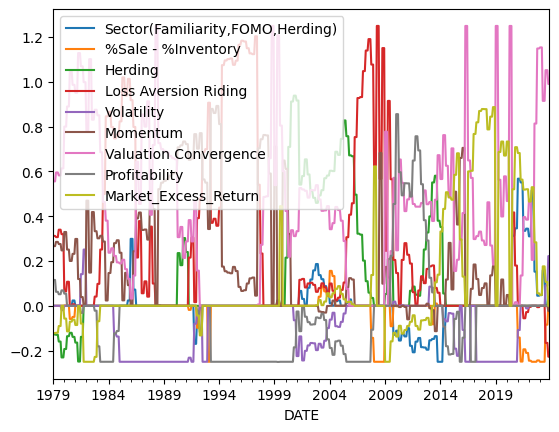

In [21]:
df_weight_optimized.plot()

<Axes: xlabel='DATE'>

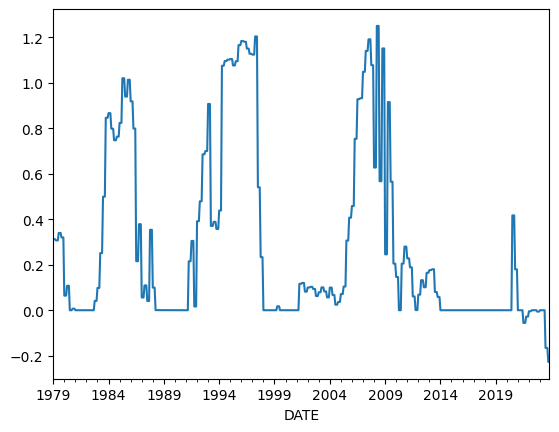

In [22]:
df_weight_optimized['Loss Aversion Riding'].plot()

<Axes: xlabel='DATE'>

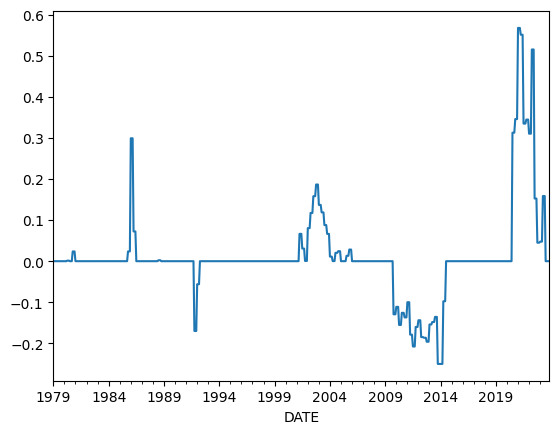

In [23]:
df_weight_optimized['Sector(Familiarity,FOMO,Herding)'].plot()

In [24]:
max_draw_down((ret_backtesting + 1 ).cumprod())

{'Peak Value': 418.72126623792883, 'MaxDD': -0.2323339520018357}

In [25]:
max_draw_down((factor_data.loc[df_backtesting.index,'Market_Excess_Return'] + 1 ).cumprod())

{'Peak Value': 6.804469131817791, 'MaxDD': -0.5251374873597185}

In [26]:
ret_backtesting

DATE
1979-01-31    0.023896
1979-02-28    0.008405
1979-03-31    0.003928
1979-04-30    0.008502
1979-05-31    0.016174
                ...   
2023-07-31   -0.037145
2023-08-31    0.044861
2023-09-30   -0.015979
2023-10-31   -0.023040
2023-11-30    0.034125
Name: Dynamic_Factor_Strategy, Length: 539, dtype: float64

<Axes: xlabel='DATE'>

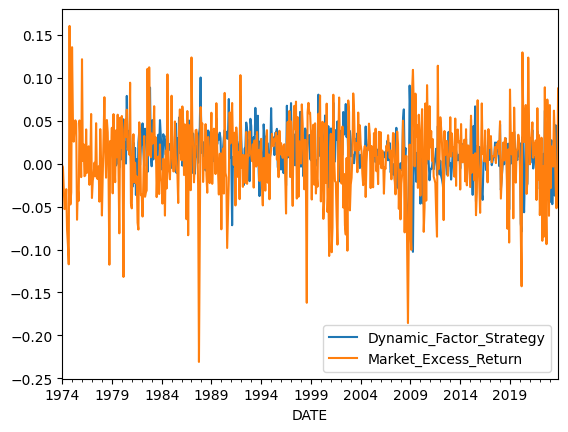

In [27]:
pd.DataFrame((ret_backtesting, factor_data['Market_Excess_Return'])).T.plot()

Text(0.5, 1.0, 'Dynamic Factor Strategy')

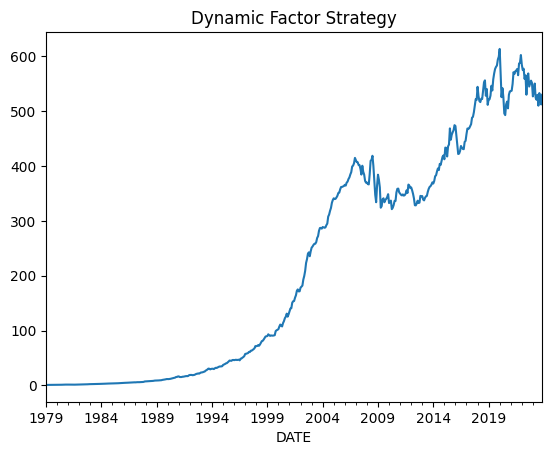

In [28]:
(ret_backtesting + 1 ).cumprod().plot()
plt.title('Dynamic Factor Strategy')

Text(0.5, 1.0, 'Market')

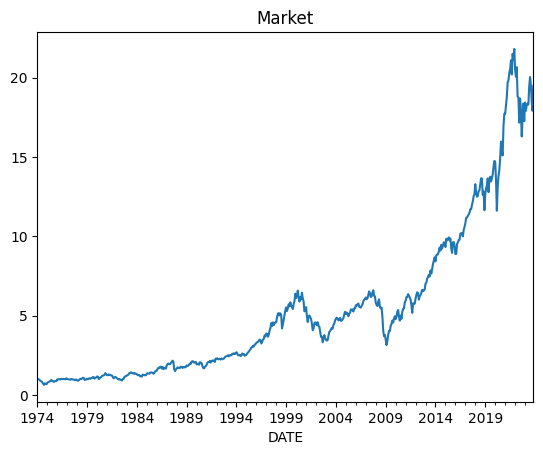

In [29]:
(factor_data['Market_Excess_Return'] + 1 ).cumprod().plot()
plt.title('Market')

In [30]:
threshold = '2009-01-01'

Text(0.5, 1.0, 'Dynamic Factor Strategy')

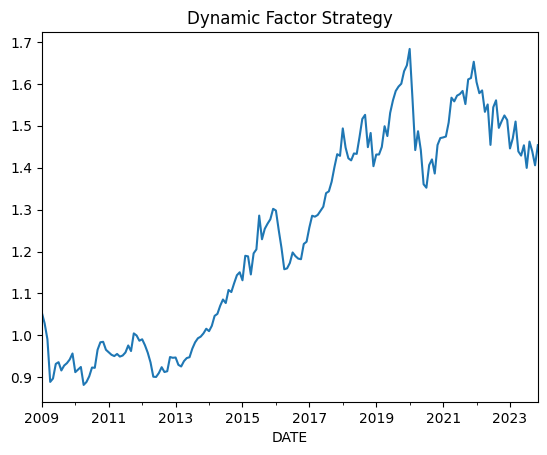

In [31]:
(ret_backtesting[ret_backtesting.index > threshold] + 1 ).cumprod().plot()
plt.title('Dynamic Factor Strategy')

In [32]:
ret_mkt_temp = factor_data.loc[df_backtesting.index,'Market_Excess_Return']

Text(0.5, 1.0, 'Market')

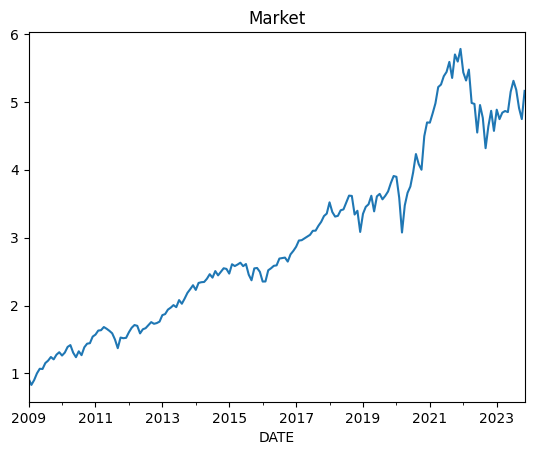

In [33]:
(ret_mkt_temp[ret_mkt_temp.index > threshold]+ 1 ).cumprod().plot()
plt.title('Market')

In [34]:
threshold = '2009-01-01'

In [35]:
ret_mkt_temp[ret_mkt_temp.index > threshold]

DATE
2009-01-31   -0.077567
2009-02-28   -0.100349
2009-03-31    0.086595
2009-04-30    0.109299
2009-05-31    0.067683
                ...   
2023-07-31    0.031330
2023-08-31   -0.024978
2023-09-30   -0.051805
2023-10-31   -0.033284
2023-11-30    0.087624
Name: Market_Excess_Return, Length: 179, dtype: float64